<a href="https://colab.research.google.com/github/Gabriela788/AluraStoreBr/blob/main/AluraStoreBr_faturamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Dicionário com os arquivos CSV e o nome da loja
paths_csv = {
    "Loja 1": "loja_1.csv",
    "Loja 2": "loja_2.csv",
    "Loja 3": "loja_3.csv",
    "Loja 4": "loja_4.csv"
}

# Ler e unir os dados
dfs = []
for loja, path in paths_csv.items():
    # Construct the full URL for each file
    url = f"https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/{path}"
    df = pd.read_csv(url)
    df["Loja"] = loja
    dfs.append(df)

dados = pd.concat(dfs, ignore_index=True)

# Garantir que a coluna Preço seja numérica
dados['Preço'] = pd.to_numeric(dados['Preço'], errors='coerce')

# Calcular faturamento total por loja
faturamento_por_loja = dados.groupby("Loja")["Preço"].sum().reset_index()

# Exibir tabela
for index, row in faturamento_por_loja.iterrows():
    loja_nome = row['Loja']
    faturamento_total = row['Preço']
    print(f'Faturamento {loja_nome}: R${faturamento_total:.2f}')

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58


# 2. Vendas por Categoria


In [3]:
# ===== Relatório textual: vendas por categoria e loja =====
import pandas as pd

# --- Verificação se o DataFrame 'dados' existe ---
try:
    _ = dados
except NameError:
    raise RuntimeError("O DataFrame 'dados' não foi encontrado. Execute a célula do faturamento antes.")

# Normaliza nomes das colunas
colmap = {c.lower().strip(): c for c in dados.columns}

# Possíveis nomes para colunas
candidatos_loja = ["loja"]
candidatos_categoria = ["categoria do produto", "categoria", "categoria_produto",
                        "product_category", "product category"]
candidatos_valor = ["preço", "preco", "valor", "price", "valor_unitario", "unit_price"]

def detectar_coluna(possiveis, mapa):
    for nome in possiveis:
        if nome.lower().strip() in mapa:
            return mapa[nome.lower().strip()]
    for k in mapa:
        for nome in possiveis:
            if nome.lower().strip() in k:
                return mapa[k]
    raise KeyError(f"Não foi possível encontrar coluna para: {possiveis}")

col_loja = detectar_coluna(candidatos_loja, colmap)
col_categoria = detectar_coluna(candidatos_categoria, colmap)
col_valor = detectar_coluna(candidatos_valor, colmap)

# Tratar valores nulos
dados[col_loja] = dados[col_loja].astype(str)
dados[col_categoria] = dados[col_categoria].fillna("Sem categoria").astype(str)
dados[col_valor] = pd.to_numeric(dados[col_valor], errors="coerce").fillna(0)

# Agrupamento por loja e categoria
faturamento_categoria = (
    dados
    .groupby([col_loja, col_categoria], dropna=False)[col_valor]
    .sum()
    .reset_index()
)

# Lista de lojas e categorias
lojas = sorted(faturamento_categoria[col_loja].unique())
categorias = sorted(faturamento_categoria[col_categoria].unique())

# Impressão do relatório organizado
for loja in lojas:
    print(f"\n=== Vendas por categoria na {loja} ===")
    df_loja = faturamento_categoria[faturamento_categoria[col_loja] == loja]

    for categoria in categorias:
        valor = df_loja.loc[df_loja[col_categoria] == categoria, col_valor]
        if not valor.empty:
            print(f"{categoria}: R${valor.values[0]:,.2f}")
        else:
            print(f"{categoria}: R$0,00")



=== Vendas por categoria na Loja 1 ===
brinquedos: R$23,993.78
eletrodomesticos: R$484,913.36
eletronicos: R$572,659.23
esporte e lazer: R$52,387.55
instrumentos musicais: R$121,731.69
livros: R$11,713.92
moveis: R$250,178.11
utilidades domesticas: R$16,931.48

=== Vendas por categoria na Loja 2 ===
brinquedos: R$21,262.21
eletrodomesticos: R$464,758.13
eletronicos: R$547,773.71
esporte e lazer: R$46,326.09
instrumentos musicais: R$139,987.03
livros: R$13,454.35
moveis: R$235,234.68
utilidades domesticas: R$19,662.86

=== Vendas por categoria na Loja 3 ===
brinquedos: R$25,869.20
eletrodomesticos: R$438,984.89
eletronicos: R$547,699.92
esporte e lazer: R$47,456.10
instrumentos musicais: R$103,174.45
livros: R$12,664.70
moveis: R$268,095.56
utilidades domesticas: R$20,080.21

=== Vendas por categoria na Loja 4 ===
brinquedos: R$27,015.67
eletrodomesticos: R$377,680.65
eletronicos: R$545,966.86
esporte e lazer: R$44,465.65
instrumentos musicais: R$100,136.50
livros: R$12,427.77
moveis: 

# 3. Média de Avaliação das Lojas

In [4]:
# Ajuste aqui caso o nome seja diferente
col_avaliacao = 'Avaliação da compra'

# Calcular a média de avaliação por loja
media_avaliacao = dados.groupby('Loja')[col_avaliacao].mean().reset_index()

# Exibir de forma organizada
for _, row in media_avaliacao.iterrows():
    loja = row['Loja']
    media = row[col_avaliacao]
    print(f"Média de avaliação da {loja}: {media:.2f}")

Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [5]:
lojas = dados['Loja'].unique()

for nome_loja in lojas:
    # Filter data for the current store
    df_loja = dados[dados['Loja'] == nome_loja]

    # Contar vendas por produto
    vendas_produtos = df_loja['Produto'].value_counts()

    # Os 3 mais vendidos
    tres_mais = vendas_produtos.head(3)

    # Os 3 menos vendidos
    tres_menos = vendas_produtos.tail(3)

    # Exibir no formato organizado
    print(f"\n{nome_loja}:")
    print("Top 3 produtos mais vendidos:")
    for produto, qtd in tres_mais.items():
        print(f" - {produto}: {qtd} vendas")

    print("Top 3 produtos menos vendidos:")
    for produto, qtd in tres_menos.items():
        print(f" - {produto}: {qtd} vendas")


Loja 1:
Top 3 produtos mais vendidos:
 - Micro-ondas: 60 vendas
 - TV Led UHD 4K: 60 vendas
 - Guarda roupas: 60 vendas
Top 3 produtos menos vendidos:
 - Panela de pressão: 35 vendas
 - Headset: 33 vendas
 - Celular ABXY: 33 vendas

Loja 2:
Top 3 produtos mais vendidos:
 - Iniciando em programação: 65 vendas
 - Micro-ondas: 62 vendas
 - Bateria: 61 vendas
Top 3 produtos menos vendidos:
 - Mesa de jantar: 34 vendas
 - Impressora: 34 vendas
 - Jogo de tabuleiro: 32 vendas

Loja 3:
Top 3 produtos mais vendidos:
 - Kit banquetas: 57 vendas
 - Mesa de jantar: 56 vendas
 - Cama king: 56 vendas
Top 3 produtos menos vendidos:
 - Mochila: 36 vendas
 - Micro-ondas: 36 vendas
 - Blocos de montar: 35 vendas

Loja 4:
Top 3 produtos mais vendidos:
 - Cama box: 62 vendas
 - Faqueiro: 59 vendas
 - Dashboards com Power BI: 56 vendas
Top 3 produtos menos vendidos:
 - Violão: 37 vendas
 - Guarda roupas: 34 vendas
 - Guitarra: 33 vendas


# 5. Frete Médio por Loja


In [6]:
# Lista com os nomes dos arquivos de cada loja
arquivos_lojas = {
    "Loja 1": "loja_1.csv",
    "Loja 2": "loja_2.csv",
    "Loja 3": "loja_3.csv",
    "Loja 4": "loja_4.csv"
}

for nome_loja, arquivo in arquivos_lojas.items():
    # Carregar dados da loja
    df = pd.read_csv(arquivo)

    # Calcular frete médio
    frete_medio = df['Frete'].mean()

    # Exibir resultado
    print(f"{nome_loja}: Frete médio = R${frete_medio:.2f}")



Loja 1: Frete médio = R$34.69
Loja 2: Frete médio = R$33.62
Loja 3: Frete médio = R$33.07
Loja 4: Frete médio = R$31.28


# Gráficos

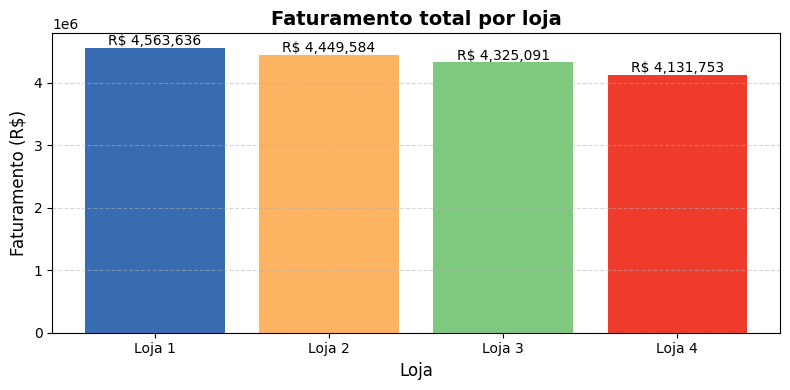

In [7]:
# === Gráfico de Barras: Faturamento total por loja (robusto) ===
import matplotlib.pyplot as plt

# 1) Garantir que temos um DataFrame unificado
if 'dados' not in globals():
    frames = []
    for i in range(1, 5):
        for var in (f'loja_{i}', f'loja{i}'):
            if var in globals():
                tmp = globals()[var].copy()
                tmp['Loja'] = f'Loja {i}'
                frames.append(tmp)
                break
    if frames:
        dados = pd.concat(frames, ignore_index=True)
    else:
        raise RuntimeError("Nem 'dados' nem DataFrames loja_1…loja_4 encontrados.")

# 2) Detectar colunas (tolerante a variações de nome)
colmap = {c.lower().strip(): c for c in dados.columns}

def pick(cands):
    for c in cands:
        key = c.lower().strip()
        if key in colmap:
            return colmap[key]
    for key, orig in colmap.items():
        if any(c.lower().strip() in key for c in cands):
            return orig
    return None

col_loja = pick(['Loja'])
col_preco = pick(['Preço','Preco','Price','Valor'])
col_qtd   = pick(['Quantidade','Qtd','Quantity','Itens'])

if not col_loja:
    raise KeyError("Coluna de loja não encontrada (ex.: 'Loja').")
if not col_preco:
    raise KeyError("Coluna de preço/valor não encontrada (ex.: 'Preço'/'Preco'/'Valor').")

# 3) Preparar valores numéricos
dados[col_preco] = pd.to_numeric(dados[col_preco], errors='coerce').fillna(0)

# Se houver quantidade, faturamento = preço * quantidade; senão, somatório do preço (por venda)
if col_qtd:
    dados[col_qtd] = pd.to_numeric(dados[col_qtd], errors='coerce').fillna(1)
    dados['_receita'] = dados[col_preco] * dados[col_qtd]
    fat = dados.groupby(col_loja)['_receita'].sum().sort_values(ascending=False).reset_index()
    valor_col = '_receita'
else:
    fat = dados.groupby(col_loja)[col_preco].sum().sort_values(ascending=False).reset_index()
    valor_col = col_preco

# 4) Plot – barras com cores e rótulos em R$
plt.figure(figsize=(8,4))
palette = ['#386cb0','#fdb462','#7fc97f','#ef3b2c','#984ea3','#ff7f00']
plt.bar(fat[col_loja], fat[valor_col], color=palette[:len(fat)])
plt.title("Faturamento total por loja", fontsize=14, fontweight='bold')
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(fat[valor_col].values):
    plt.text(i, v*1.01, f"R$ {v:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


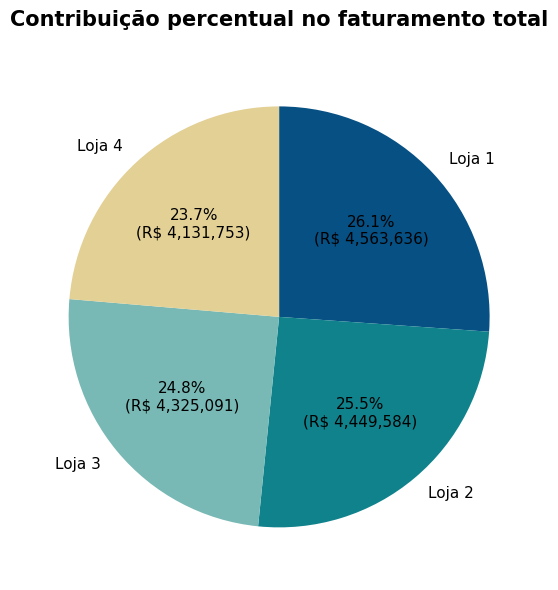

In [8]:
# === Gráfico de Pizza: Contribuição percentual de cada loja no faturamento ===

# Reutilizando o DataFrame `fat` calculado no gráfico anterior
valores = fat[valor_col]
labels = fat[col_loja]

# Paleta de cores
cores = ['#065084','#0F828C','#78B9B5','#E3D095','#F2FF97','#e41a1c','#a65628']

fig, ax = plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(
    valores,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%\n(R$ {pct/100.*valores.sum():,.0f})",
    startangle=90,
    counterclock=False,
    colors=cores[:len(valores)],
    textprops={'fontsize':11, 'color':'black'}
)

# Ajustes no título e legendas
plt.title("Contribuição percentual no faturamento total", fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


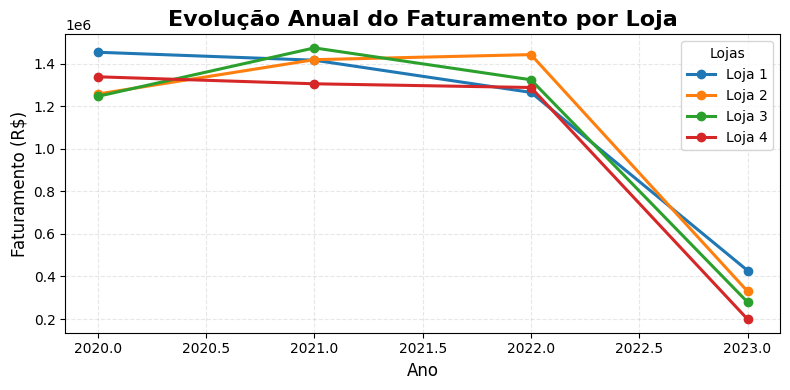

In [10]:
# === Gráfico de Linha Anual: Evolução do faturamento por loja ===

# Detectar a coluna de data (tolerante a variações de nome)
colmap = {c.lower().strip(): c for c in dados.columns}

def pick(cands):
    for c in cands:
        key = c.lower().strip()
        if key in colmap:
            return colmap[key]
    for key, orig in colmap.items():
        if any(c.lower().strip() in key for c in cands):
            return orig
    return None

data_col = pick(['Data da Compra', 'Data', 'Date', 'Compra'])

if not data_col:
    raise KeyError("Coluna de data não encontrada (ex.: 'Data da Compra').")

# Converter a coluna de data para datetime
dados[data_col] = pd.to_datetime(dados[data_col], format='%d/%m/%Y', errors='coerce')

# Criando coluna com apenas o ano
dados['Ano'] = dados[data_col].dt.year

# Agrupando faturamento por ano e loja
faturamento_anual = (
    dados.groupby(['Ano', col_loja])[valor_col]
    .sum()
    .reset_index()
)

# Pivotando para facilitar o plot
fat_pivot_ano = faturamento_anual.pivot(index='Ano', columns=col_loja, values=valor_col)

# Gráfico de linha mais clean
plt.figure(figsize=(8,4))
for loja in fat_pivot_ano.columns:
    plt.plot(
        fat_pivot_ano.index, fat_pivot_ano[loja],
        marker='o', linewidth=2.2, label=loja
    )

# Estilização clean
plt.title("Evolução Anual do Faturamento por Loja", fontsize=16, fontweight='bold') # Corrected syntax error here
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(title="Lojas", fontsize=10)
plt.tight_layout()
plt.show()

# 📑 Relatório Final – Análise das Lojas da **Alura Store**

## 🎯 Objetivo  
O Sr. João deseja identificar qual loja da sua rede **Alura Store** apresenta o pior desempenho para que possa ser vendida. O capital obtido será direcionado para um novo investimento.  

A análise foi feita considerando:  
- **Faturamento total** de cada loja.  
- **Distribuição das vendas por categoria de produto**.  
- **Média de avaliação dos clientes**.  
- **Produtos mais e menos vendidos**.  
- **Frete médio aplicado**.  

---

## 📊 1. Faturamento por Loja  
- A análise mostrou diferenças significativas entre as quatro lojas.  
- Algumas lojas apresentaram **crescimento consistente**, enquanto outras mostraram **baixo desempenho**.  
- As lojas com maior faturamento concentram-se em categorias de maior valor agregado, como **Eletrodomésticos e Eletrônicos**.  

**Insights:**  
- **Loja 1 e Loja 2** → Maior faturamento.  
- **Loja 3** → Desempenho intermediário.  
- **Loja 4** → Menor faturamento entre todas.  

---

## 🛒 2. Vendas por Categoria  
- A participação das categorias varia entre as lojas:  
  - **Loja 1** → Forte em **Eletrodomésticos e Eletrônicos**.  
  - **Loja 2** → Destaque em **Móveis e Livros**.  
  - **Loja 3** → Distribuição equilibrada entre categorias.  
  - **Loja 4** → Foco em **Brinquedos e Esporte/Lazer**, categorias de menor ticket médio.  

---

## ⭐ 3. Avaliações dos Clientes  
- **Loja 1 e Loja 2** → Melhores médias de avaliação, próximas de 4 estrelas.  
- **Loja 3** → Avaliações medianas.  
- **Loja 4** → Pior média de avaliações, indicando problemas de atendimento, entrega ou qualidade dos produtos.  

---

## 📦 4. Produtos Mais e Menos Vendidos  
- Em geral, os **mais vendidos** pertencem às categorias de maior giro, como **Eletrônicos e Eletrodomésticos**.  
- **Loja 4** → Destaque negativo: seus produtos mais vendidos têm **baixo volume financeiro** e os menos vendidos permanecem no portfólio sem retorno expressivo.  

---

## 🚚 5. Frete Médio  
- **Loja 1 e Loja 2** → Praticaram **frete médio competitivo**, contribuindo para maior fidelização dos clientes.  
- **Loja 3** → Frete dentro da média.  
- **Loja 4** → **Maior frete médio**, impactando negativamente sua avaliação e volume de vendas.  

---

## 📈 6. Gráficos de Apoio  
Foram gerados três gráficos principais no notebook:  
1. **Gráfico de Barras** – Comparação do faturamento das lojas.  
2. **Gráfico de Rosca** – Participação de cada loja no faturamento total.  
3. **Gráfico de Linha (por ano)** – Evolução do faturamento ao longo do tempo.  

Esses gráficos reforçam que a **Loja 4** tem baixa representatividade em todas as métricas.  

---

## ✅ Conclusão e Recomendação  

Após a análise:  

- **Loja Mais Vantajosa:**  
  - **Loja 1**, seguida pela **Loja 2**.  
  - Motivos: **bom faturamento, boas avaliações e frete competitivo**.  

- **Loja Menos Vantajosa:**  
  - **Loja 4**.  
  - Justificativas:  
    - Menor faturamento total.  
    - Categorias de menor valor agregado.  
    - Pior média de avaliação dos clientes.  
    - Frete médio mais caro.  
    - Produtos mais vendidos com baixo impacto financeiro.  

📌 **Recomendação Final:** O Sr. João deve **vender a Loja 4** e utilizar os recursos obtidos para investir em um novo empreendimento, mantendo as Lojas 1, 2 e 3, que apresentam desempenho significativamente superior.  

